**Test Case** - Predicting the profits of startups based on factors like R&D Spending, Marketing Spending and Number of Employees. Use Backward Elimination to select significant features.

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the data

startup = pd.read_csv("50_Startups.csv")
startup.head(7)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51



**Profile of the data - No. of Rows,column,null values,duplicated values,data type,data byte**
---



In [3]:
# Get the information of the data

startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


obs - The DataFrame has 50 rows, 5 columns (4 numerical and 1 categorical), with no missing values.

In [4]:
# Duplicated Values

startup.duplicated().sum()

0

obs - No Duplicated values prosent in data.

In [5]:
startup.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [6]:
# Numerical Variable

numerical_feature = [i for i in startup.columns if startup[i].dtypes != "O"]
startup[numerical_feature].head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [7]:
# Categorical Column

categorical_features = [i for i in startup.columns if startup[i].dtypes == "O"]
startup[categorical_features].head()

,State
0,New York
1,California
2,Florida
3,New York
4,Florida


# **Statistical Analysis - Mean, Median, Mode, variance, standard deviation, covariance, skewness, correlation, IQR.**

In [8]:
# Statistics

startup.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,NaN,NaN,NaN,73721.6156,45902.256482,0.0,39936.37,73051.08,101602.8,165349.2
Administration,50.0,NaN,NaN,NaN,121344.6396,28017.802755,51283.14,103730.875,122699.795,144842.18,182645.56
Marketing Spend,50.0,NaN,NaN,NaN,211025.0978,122290.310726,0.0,129300.1325,212716.24,299469.085,471784.1
State,50,3,New York,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profit,50.0,NaN,NaN,NaN,112012.6392,40306.180338,14681.4,90138.9025,107978.19,139765.9775,192261.83


Obs - The dataset provide the statistics information of the data.

In [9]:
# Correlation

startup[numerical_feature].corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


obs - Profit is most strongly influenced by R&D Spend and Marketing Spend, with Administration having minimal impact.

In [ ]:
# Covariance

startup[numerical_feature].cov()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,2.107017e+09,3.111739e+08,4.065495e+09,1.800007e+09
Administration,3.111739e+08,7.849973e+08,-1.101690e+08,2.266673e+08
Marketing Spend,4.065495e+09,-1.101690e+08,1.495492e+10,3.685779e+09
Profit,1.800007e+09,2.266673e+08,3.685779e+09,1.624588e+09


In [ ]:
# The R&D Spend and Marketing Spend is shows good relationship in data.

In [ ]:
# Skewness

startup[numerical_feature].skew()

,0
R&D Spend,0.164002
Administration,-0.489025
Marketing Spend,-0.046472
Profit,0.023291


In [ ]:
# The R&D Spend is positively skewed and Marketing Spend and Administration are negatively skewed

In [ ]:
 startup.groupby('State').median()

,R&D Spend,Administration,Marketing Spend,Profit
State,,,,
California,63408.860,121597.550,174999.30,97427.84
Florida,74661.715,115728.745,253176.18,109543.12
New York,77044.010,127382.300,205517.64,108552.04


In [10]:
startup.groupby('State').mean()

,R&D Spend,Administration,Marketing Spend,Profit
State,,,,
California,64657.674118,120746.507059,182540.929412,103905.175294
Florida,80724.016250,121768.897500,247323.551250,118774.024375
New York,76195.062353,121543.470588,205346.015882,113756.446471


In [11]:
for col in categorical_features:
    print(f"Value counts for {col}:")
    print(startup[col].value_counts())
    print()

Value counts for State:
State
New York      17
California    17
Florida       16
Name: count, dtype: int64



In [12]:
# The unique values in the data

print("Unique values per column")
startup.nunique().sort_values(ascending = True)

Unique values per column


,0
State,3
Marketing Spend,48
R&D Spend,49
Administration,50
Profit,50


In [13]:
from scipy.stats import normaltest
normaltest(startup['R&D Spend'])

NormaltestResult(statistic=2.5283987387721436, pvalue=0.28246535604463124)

obs - The p-value (0.282) from the normality test indicates that the data does not significantly deviate from a normal distribution (assuming a significance level of 0.05).

<Axes: xlabel='R&D Spend', ylabel='Density'>

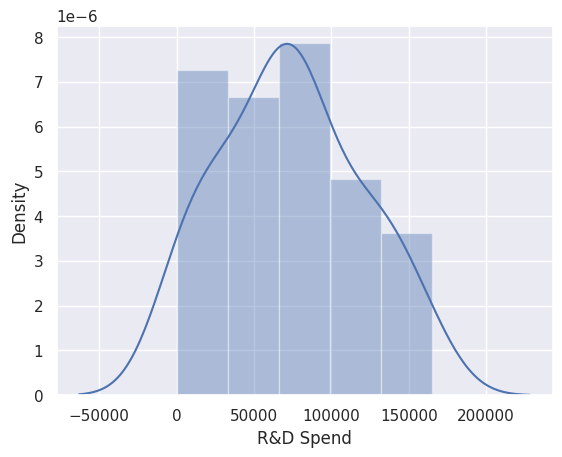

In [14]:
sns.distplot(startup['R&D Spend'])

In [15]:
normaltest(startup['Administration'])

NormaltestResult(statistic=2.484488294064544, pvalue=0.2887355253581867)

obs - The p-value (0.289) from the normality test suggests that there is no significant deviation from a normal distribution, meaning the data can be considered approximately normal.

<Axes: xlabel='Administration', ylabel='Density'>

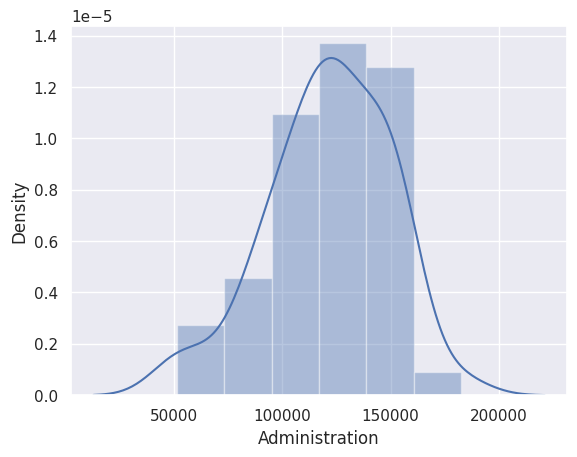

In [ ]:
sns.distplot(startup['Administration'])

In [16]:
normaltest(startup['Marketing Spend'])

NormaltestResult(statistic=1.538404030491496, pvalue=0.4633826931386342)

obs - The p-value (0.463) from the normality test is greater than the common significance level of 0.05, indicating that there is no significant deviation from a normal distribution.

<Axes: xlabel='Marketing Spend', ylabel='Density'>

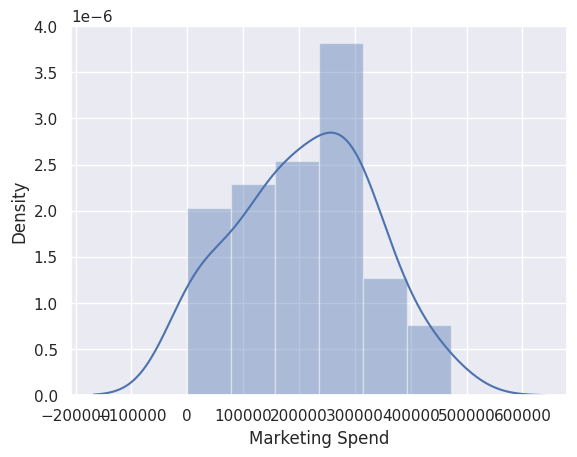

In [17]:
sns.distplot(startup['Marketing Spend'])

<Axes: >

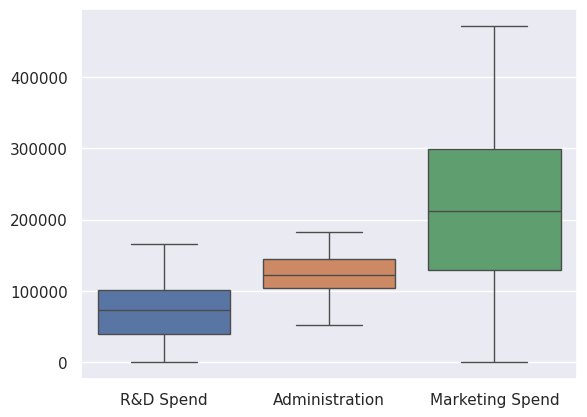

In [18]:
sns.boxplot(data = startup[numerical_feature[:-1]])

In [ ]:
# No outlier detected in dataset

In [ ]:
# IQR for "R&D Spend"

q1 = startup['R&D Spend'].quantile(0.25)
q3 = startup['R&D Spend'].quantile(0.75)
iqr = q3 - q1
print(iqr)
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(lower_bound)
print(upper_bound)

61666.43
-52563.275
194102.445


In [ ]:
# IQR for "Administration"

q1 = startup['Administration'].quantile(0.25)
q3 = startup['Administration'].quantile(0.75)
iqr = q3 - q1
print(iqr)
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(lower_bound)
print(upper_bound)

41111.30499999999
42063.91750000001
206509.13749999998


In [ ]:
# IQR for "Marketing Spend"

q1 = startup['Marketing Spend'].quantile(0.25)
q3 = startup['Marketing Spend'].quantile(0.75)
iqr = q3 - q1
print(iqr)
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(lower_bound)
print(upper_bound)

170168.95249999996
-125953.29624999993
554722.5137499999


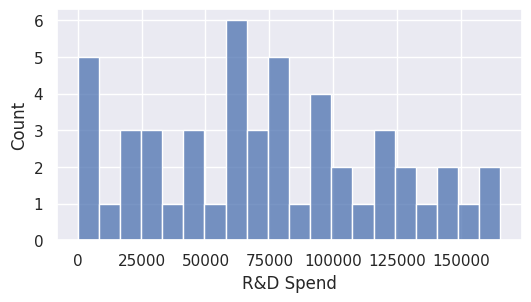

In [ ]:
#Histrogram with bins
plt.figure(figsize = (6,3))
sns.histplot(startup['R&D Spend'],bins = 20)
plt.show()

In [ ]:
#Now the distribution is changed which able to view peaks and trough for "R&D Spend"

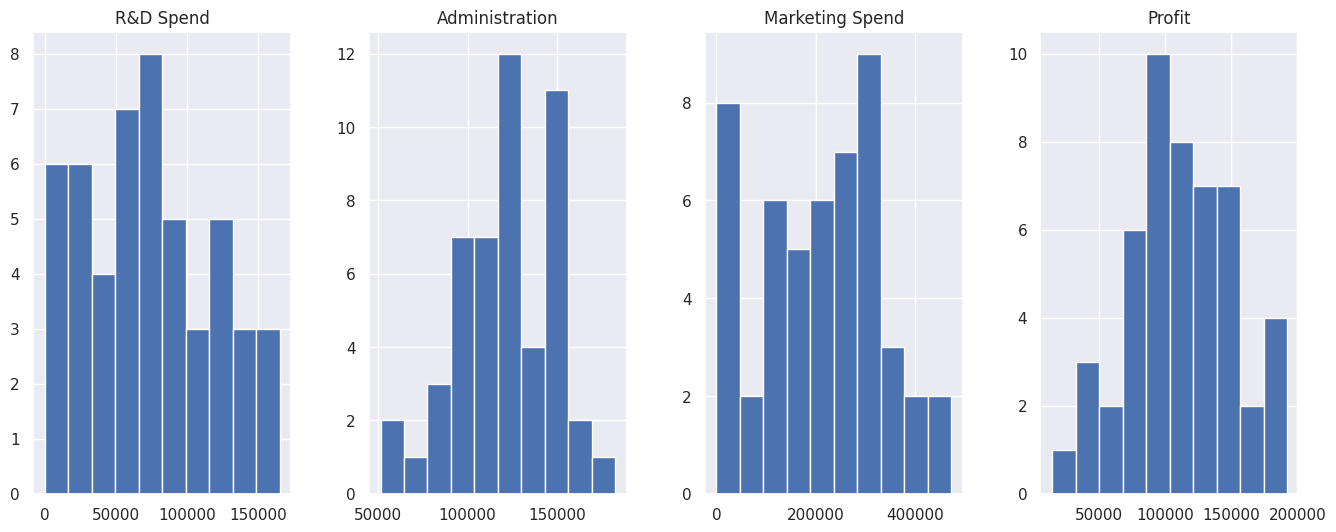

In [ ]:
# numerical Analysis

startup.hist(layout=(1,6), figsize=(25,6))
plt.show()

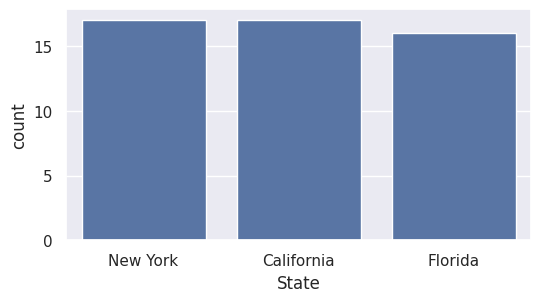

In [19]:
# Categorical Analysis

plt.figure(figsize = (6,3))
sns.countplot(data=startup, x='State')
plt.show()

In [ ]:
# The "State" distribution is no differnce in visualization

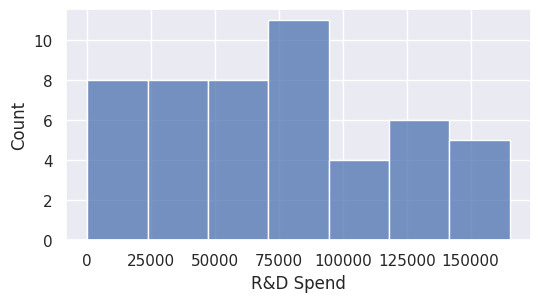

In [ ]:
# Graphical Analysis

plt.figure(figsize = (6,3))
sns.histplot(startup['R&D Spend'])
plt.show()

In [ ]:
# The histrogram is shows distribution of "R&D Spend" but have you noticed that the number of bins is random.

<Axes: >

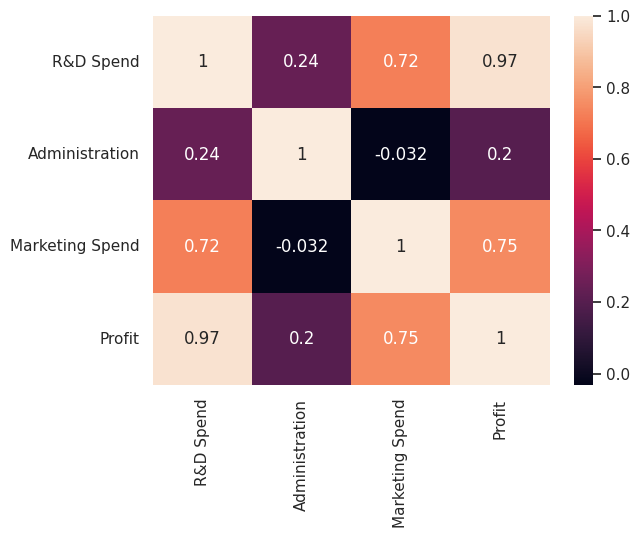

In [20]:
sns.heatmap(startup[numerical_feature].corr(), annot = True)

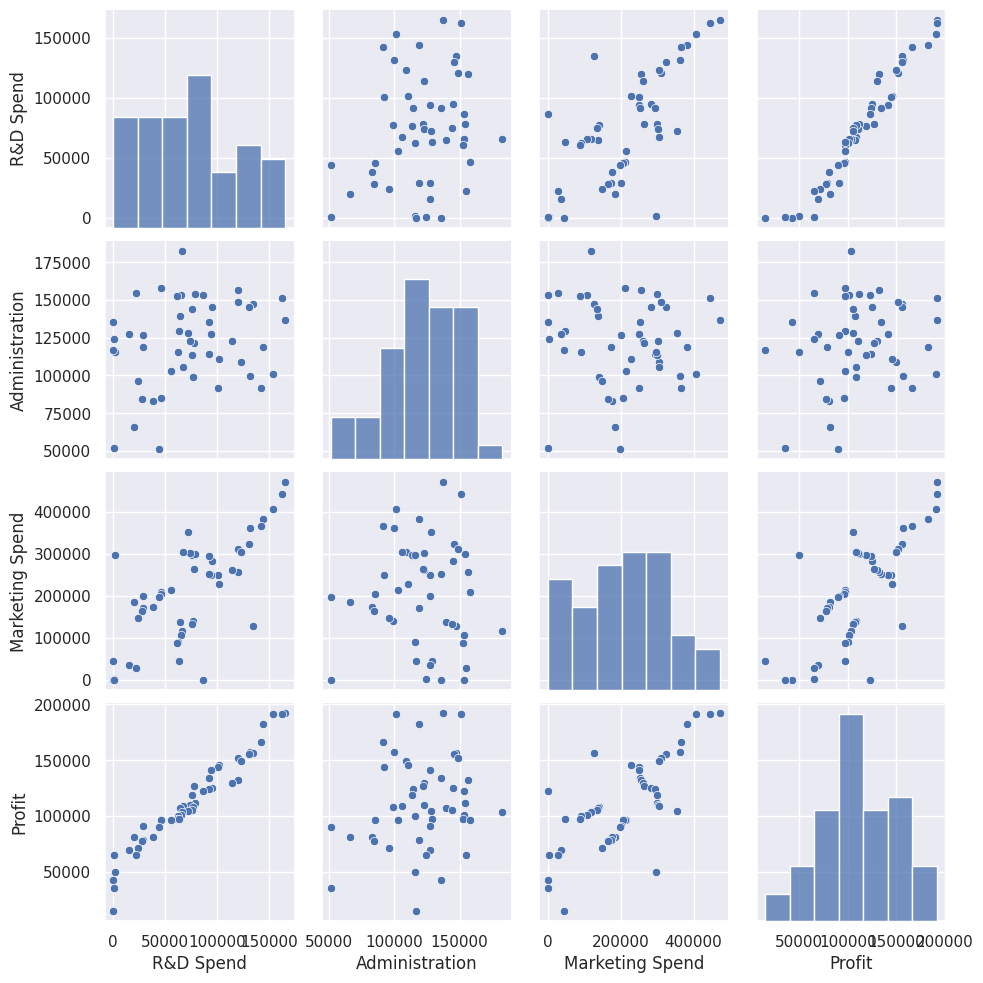

In [21]:
sns.pairplot(startup[numerical_feature])